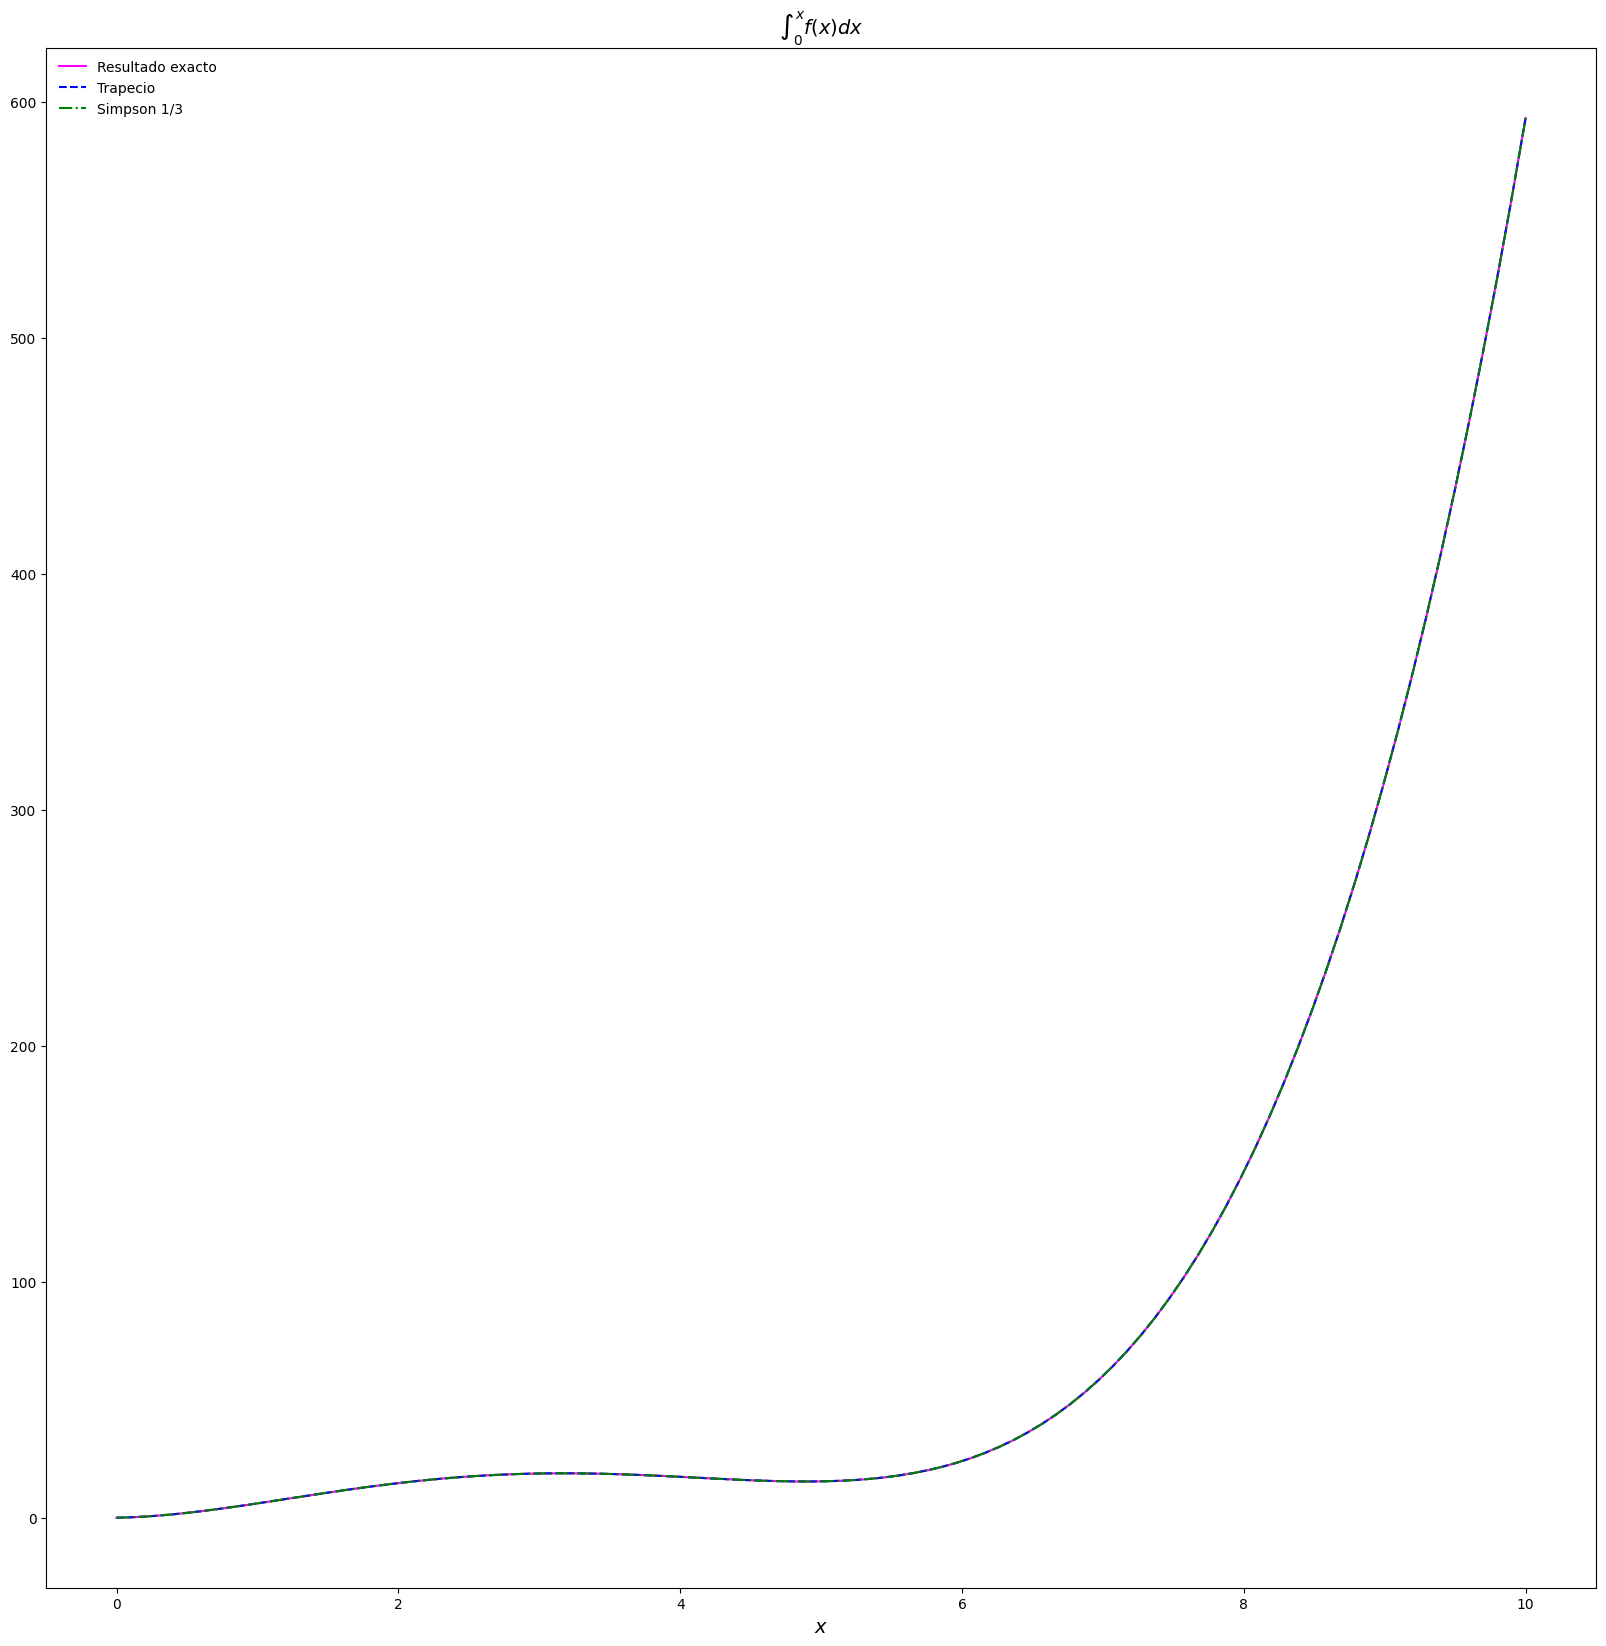

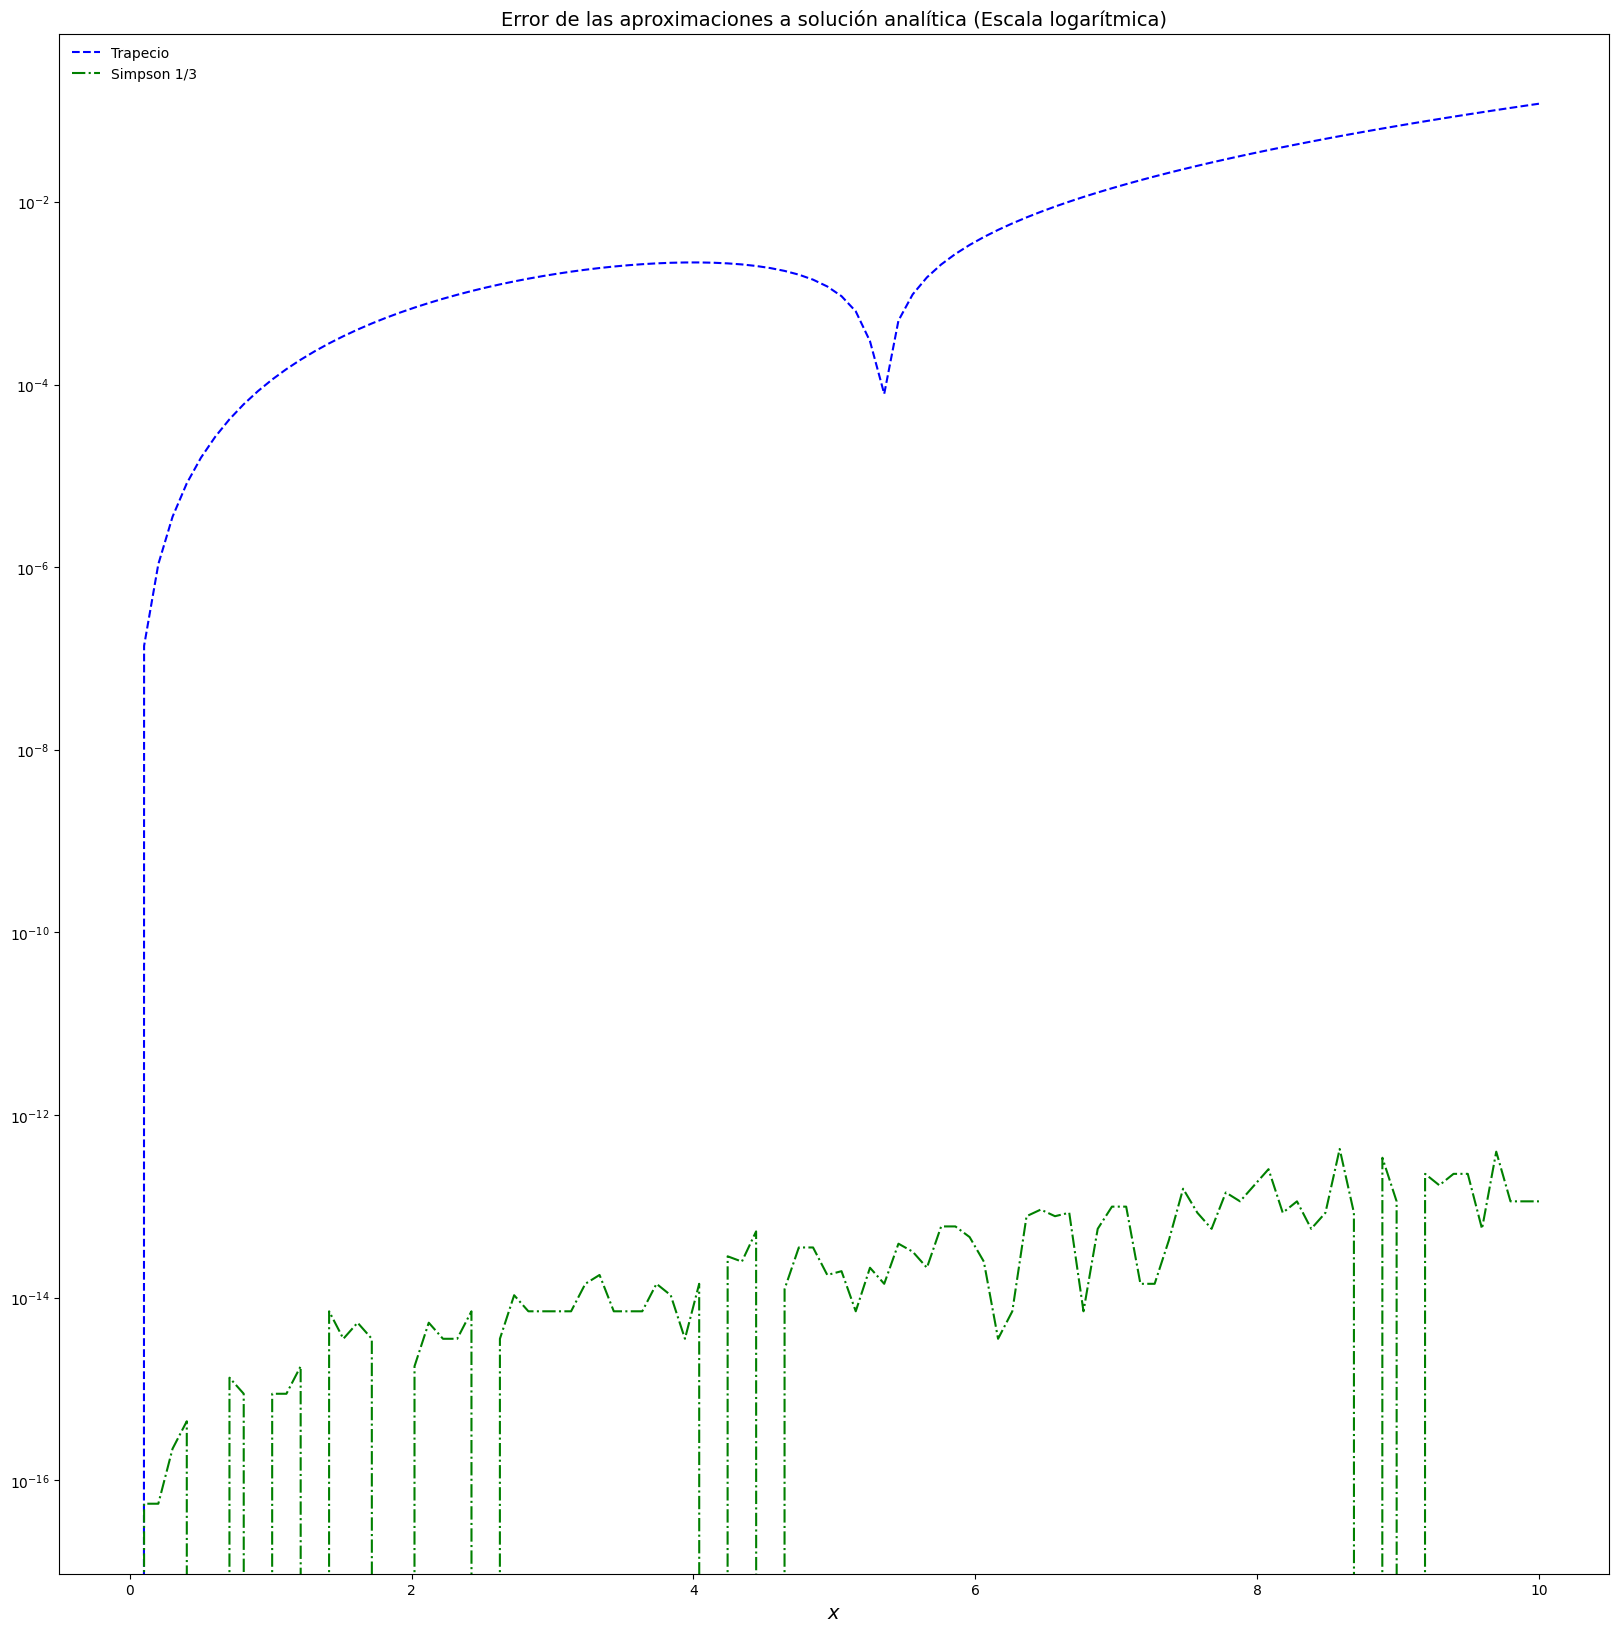

In [1]:
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import pandas as pd # type: ignore

# Definimos integrando
def f(x):
    return x*(x-3)*(x-5) + 1

# Parametros (como se definen parámetros fijos, se utilizará esto como referencia para la creación de funciones)
a = 0
b = 10
N = 100
x = np.linspace(a, b, N)

# Implementacion trapecio
def trapezoidal(a, b, N):
    delta = (b - a) / (N-1)
    x_vals = np.linspace(a, b, N)
    f_vals = f(x_vals)
    result = 0.5 * delta * (f(a) + f(b)) + delta * np.sum(f_vals[1:-1]) # primer y último término quedan fuera de la suma
    return result

# Implementación Simpson 1/3
def simpsontercio(a, b, N):
    delta = (b - a)/(N)
    x_vals = np.linspace(a, b, N+1) # Para que funcione correctamente, se necesitan puntos impares, por lo que sumamos 1 a nuestro N = 100
    f_vals = f(x_vals)
    result = (delta/3)*(f(a) + f(b) + 4*sum(f_vals[1:-1:2]) + 2*sum(f_vals[2:-2:2])) # Indexamos los indices impares a la multiplicaión por 4 y los pares a la multiplicación por 2
    return result

# integral exacta de f(x)
def intf(x):
    return x**4/4 -8*x**3/3 + 15*x**2/2 + x
y_e=intf(x)

# integrales usando trapecio y Simpson 1/3
y_t = np.array([trapezoidal(a, xi, N) for xi in x])
y_s = np.array([simpsontercio(a, xi, N) for xi in x])

# valor absoluto de la diferencia entre trapecio/simpson 1/3 y valor exacto
abs_t_e = np.abs((y_t)-(y_e))
abs_s_e = np.abs((y_s)-(y_e))

# Graficamos


plt.figure(figsize = (20, 20))
plt.plot(x, y_e, color='magenta', label='Resultado exacto')
plt.plot(x, y_t, color='blue', linestyle='dashed', label='Trapecio')
plt.plot(x, y_s, color='green', linestyle='dashdot', label='Simpson 1/3')
plt.title("$\int_0^x f(x) dx$", fontsize=14)
plt.xlabel("$x$", fontsize=14)
plt.legend(loc='upper left', frameon=False)

plt.show()

plt.figure(figsize = (20, 20))
plt.plot(x, abs_t_e, color='blue', linestyle='dashed', label='Trapecio')
plt.plot(x, abs_s_e, color='green', linestyle='dashdot', label='Simpson 1/3')
plt.title("Error de las aproximaciones a solución analítica (Escala logarítmica)", fontsize=14)
plt.xlabel("$x$", fontsize=14)
plt.legend(loc='upper left', frameon=False)
plt.yscale('log') # Aplicamos escala logarítmica para una mejor visualización

plt.show()